### **Project Overview:**
The goal of this project is to build a machine learning model that predicts whether a loan application will be approved or rejected based on various input features. These features include personal financial details, asset values, and credit scores, which are common in loan application processes.

# Data Exploration

## Library And Imports

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [21]:
df = pd.read_csv("S:/DS/new_projects/loan_prediction/Loan_Approval_Predictor/data/loan_approval_dataset.csv")

In [22]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [23]:
df.shape

(4269, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [25]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [26]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [27]:
df.duplicated().sum()

0

### **Data Exploration Insights:**

#### **Numerical Columns:**
- **Income and Loan Amounts:**  
  The `income_annum` and `loan_amount` columns have high variance, reflecting the broad range of applicants’ financials, from low to high-income earners. These may require scaling or transformations, such as log transformations, to reduce the impact of extreme values.

- **CIBIL Score & Loan Term:**  
  The `cibil_score` ranges from 300 to 900, a typical credit score range. This column might need normalization or scaling, especially if distance-based models are used. The `loan_term`, which represents the loan duration in years, is more stable and doesn't need much transformation.

#### **Asset Values:**
- **Potential Data Issues:**  
  The `residential_assets_value` column contains an anomalous negative value (-100,000), indicating a data quality issue. This should be addressed, either by setting it to `NaN` or dropping the row to avoid introducing errors into the model.

- **Feature Scaling:**  
  Features such as `residential_assets_value`, `commercial_assets_value`, and `luxury_assets_value` have wide ranges. If distance-based algorithms (like k-NN or SVM) are used, these columns may need to be scaled to prevent large values from disproportionately influencing the model.

#### **Categorical Columns:**
- **`education`, `self_employed`, and `loan_status`:**  
  These categorical columns need to be encoded before feeding them into machine learning models. Methods like one-hot encoding or label encoding can be applied, depending on the model. For example, `loan_status`, the target variable, should be encoded as "approved" vs. "rejected" (or as 0 and 1 for binary classification).



Remove rows with negative residential_assets_value

In [28]:
len(df[df['residential_assets_value']< 0])

28

In [29]:
df = df[df['residential_assets_value'] >= 0]

In [30]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Numeric_columns

In [31]:
numeric_columns = ['income_annum', 'loan_amount', 'loan_term','cibil_score', 'residential_assets_value',
    'commercial_assets_value', 'luxury_assets_value','bank_asset_value']

Categorical_columns

In [32]:
categorical_columns = ['education', 'self_employed', 'loan_status']

# **Univariate Analysis (Exploring Individual Features)**

In [33]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette(["#81c784", "#388e3c"])

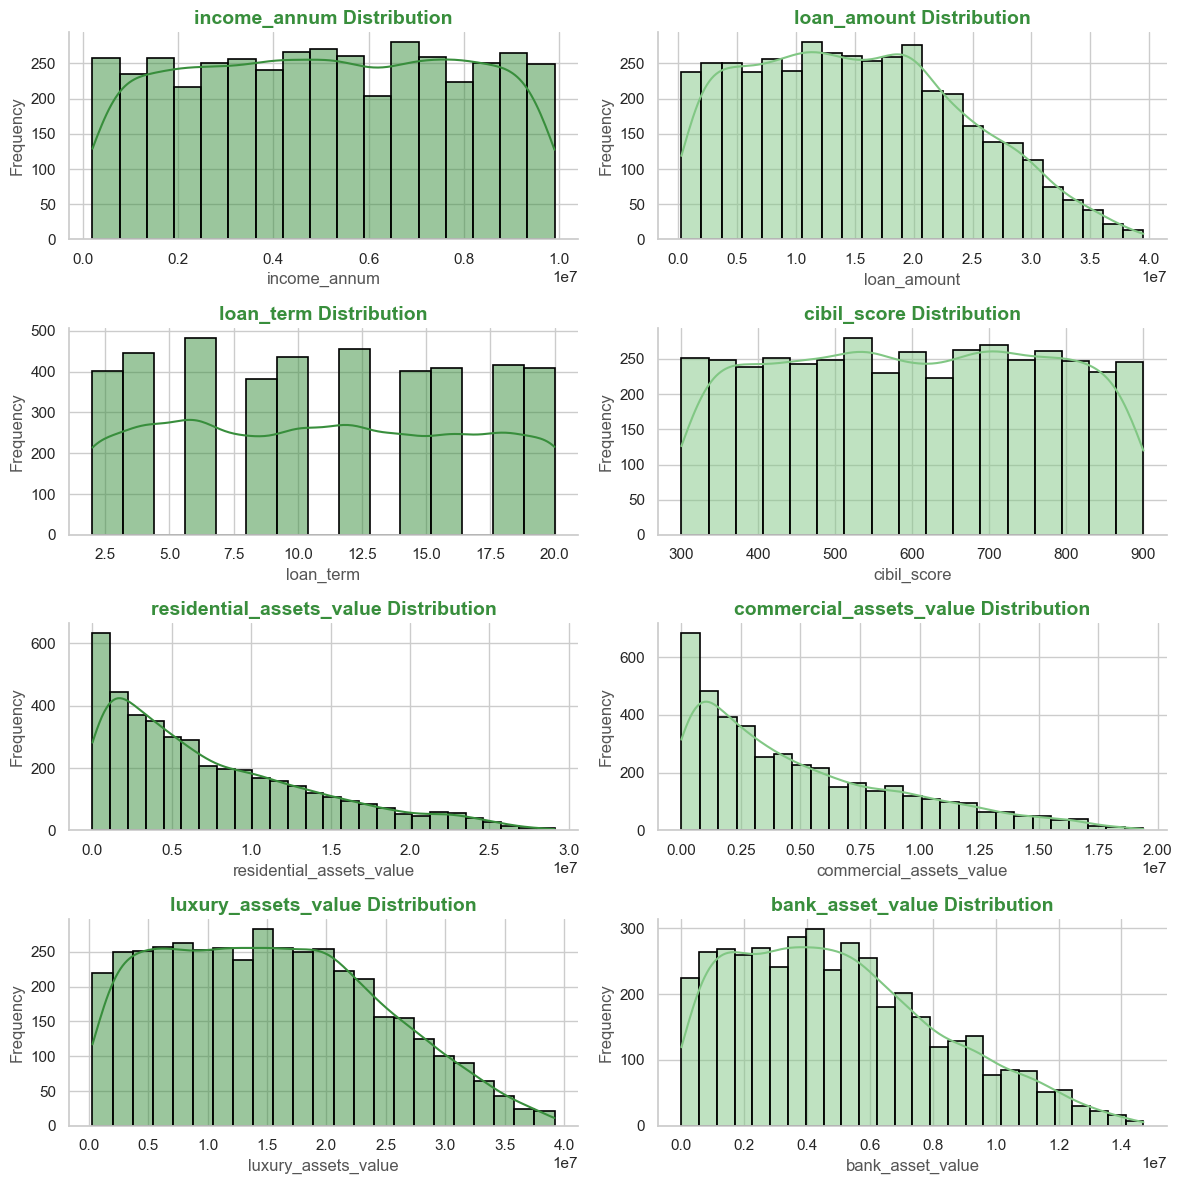

In [44]:
plt.figure(figsize=(12, 12))

for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, idx)
    sns.histplot(df[col], kde=True, color=custom_palette[idx % 2], edgecolor="black", linewidth=1.2)

    plt.title(f'{col} Distribution', fontsize=14, weight='bold', color="#388e3c")
    plt.xlabel(col, fontsize=12, color="#555555")
    plt.ylabel('Frequency', fontsize=12, color="#555555")

    sns.despine()

plt.tight_layout()
plt.show()

### **Summary of Distributions:**

1. **Loan Amount & Luxury Assets Value:**
   - These features show **slightly right-skewed** distributions, meaning most of the data points are concentrated at the lower end, with a long tail toward higher values. This suggests that the majority of applicants have smaller loan amounts and luxury assets, while a few have significantly higher values.

2. **Income, Loan Term, & CIBIL Score:**
   - These features exhibit **relatively uniform distributions**, with data spread more evenly across the entire range. This indicates that income, loan term, and CIBIL score are fairly diverse, covering a broad spectrum of applicants.

3. **Residential Assets, Commercial Assets, & Bank Assets:**
   - These features show **heavily right-skewed** distributions, with most values clustered near the lower end. There are a few high values that extend the tail to the right, suggesting that the majority of applicants have lower asset values compared to a small group with significantly higher asset values.


Boxplot was utilized to visualize the potential outliers in the dataset

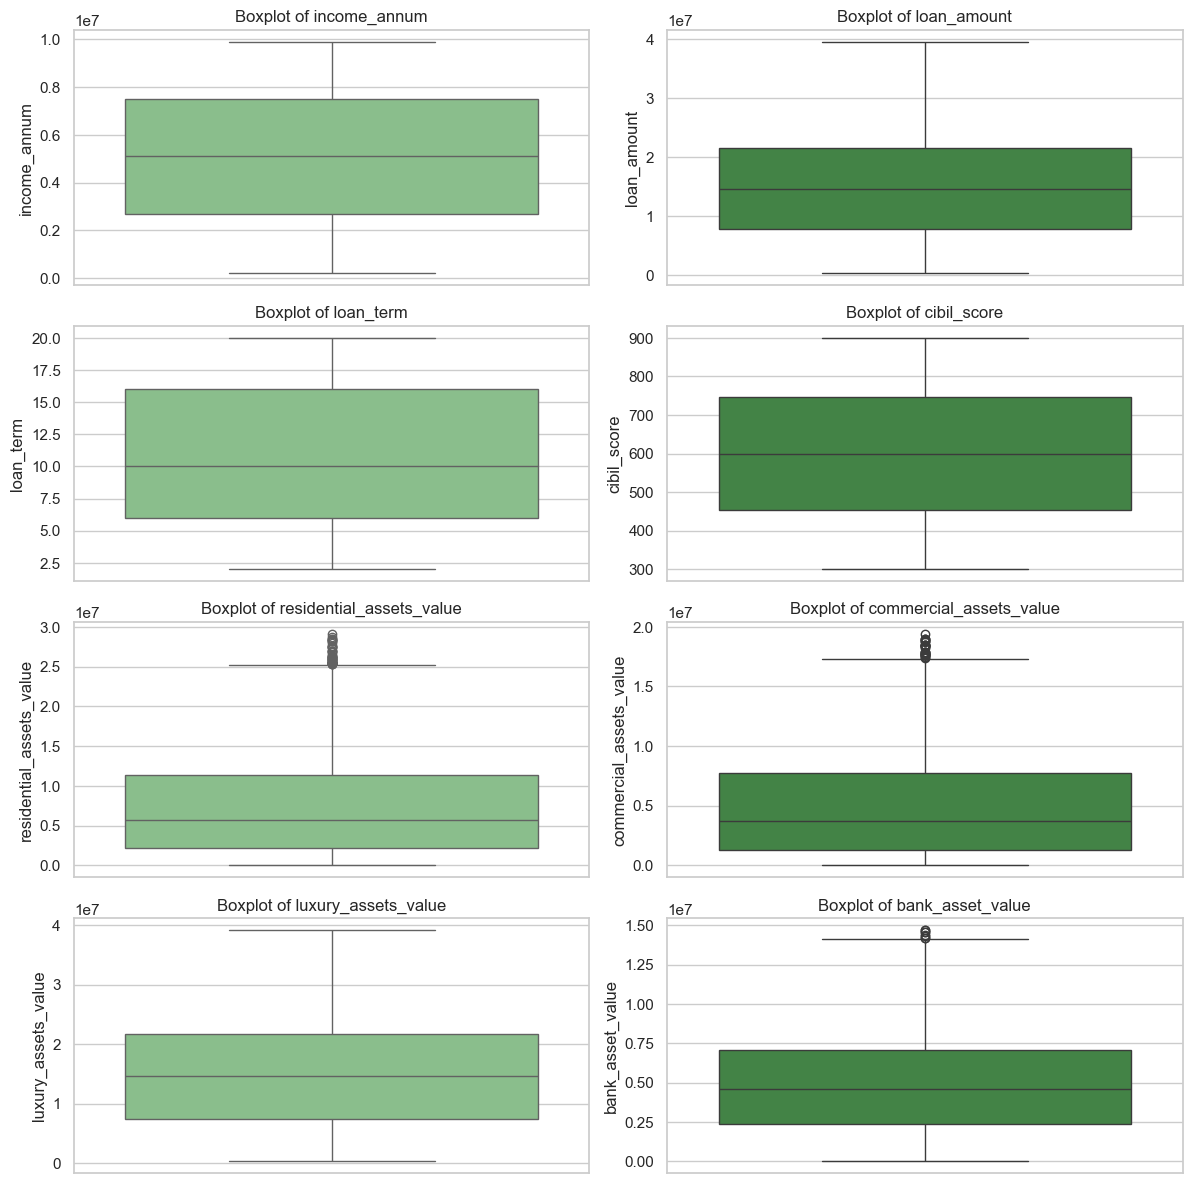

In [35]:
def plot_boxplots(df, columns):
    plt.figure(figsize=(12, 12))
    for i, col in enumerate(columns):
        plt.subplot(4, 2, i + 1)
        sns.boxplot(y=df[col], color=custom_palette[i % 2])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df, numeric_columns)

In [36]:
# Function to calculate the percentage of outliers for each column
def outlier_percentage(df, columns):
    outlier_percentages = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        # Calculate percentage of outliers
        outlier_percentages[col] = (len(outliers) / len(df)) * 100
    return outlier_percentages

# Calculate outlier percentages for the numeric columns
outlier_percentages = outlier_percentage(df, numeric_columns)

# Print outlier percentages for each column
for col, percentage in outlier_percentages.items():
    print(f'{col}: {percentage:.2f}% outliers')


income_annum: 0.00% outliers
loan_amount: 0.00% outliers
loan_term: 0.00% outliers
cibil_score: 0.00% outliers
residential_assets_value: 1.11% outliers
commercial_assets_value: 0.75% outliers
luxury_assets_value: 0.00% outliers
bank_asset_value: 0.19% outliers




### **Outlier Summary:**

- **Minimal Impact of Outliers:** The outlier percentages are very small (less than 2%).
  
- **Action:** No treatment for outliers will be performed at this stage. If outliers affect model performance later, handling them will be reconsidered.


# categorical Variable Distribution

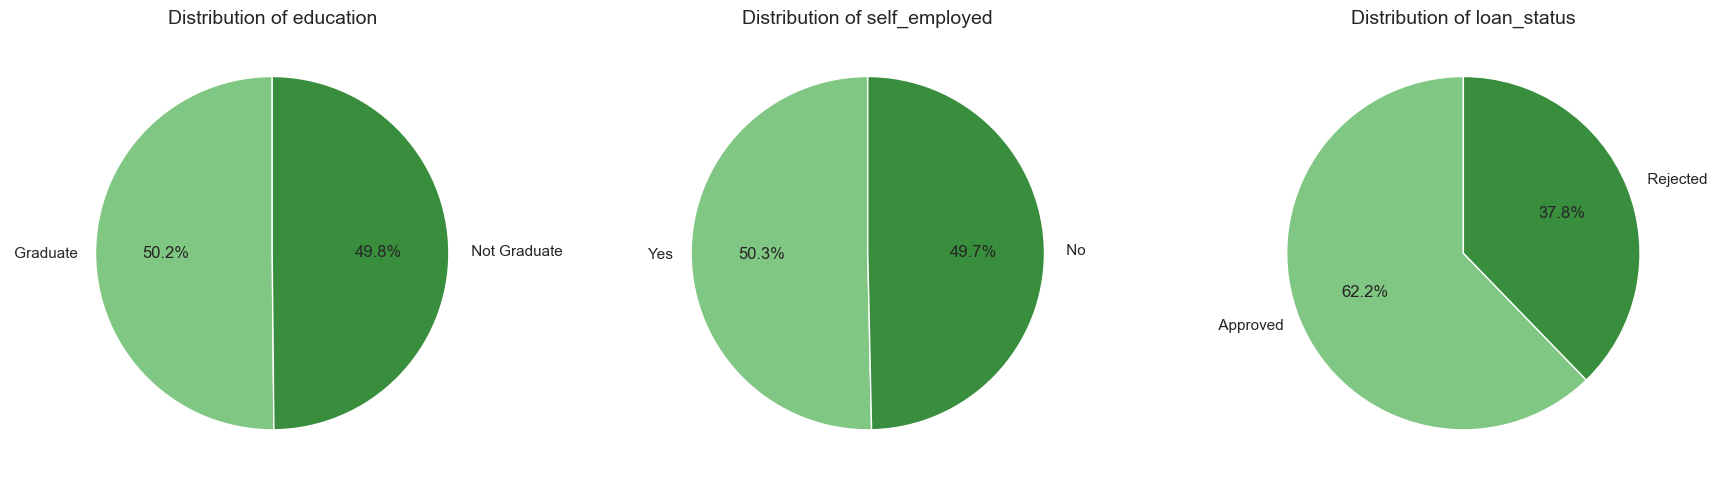

In [47]:
plt.figure(figsize=(18, 5))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    data = df[column].value_counts()
    plt.pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["#81c784", "#388e3c"]  
    )
    plt.title(f'Distribution of {column}', fontsize=14)

plt.tight_layout()
plt.show()


### **Categorical Variables Summary:**

1. **Education:**
   - **Graduate:** 2,127 applicants (50% of the data).
   - **Not Graduate:** 2,114 applicants (50% of the data).
   - This distribution is almost balanced between graduates and non-graduates.

2. **Self-Employed:**
   - **Yes:** 2,135 applicants (50.1% of the data).
   - **No:** 2,106 applicants (49.9% of the data).
   - This is also a balanced distribution, with a slight majority being self-employed.

3. **Loan Status (Target Variable):**
   - **Approved:** 2,640 applicants (61.9% of the data).
   - **Rejected:** 1,601 applicants (38.1% of the data).
   - The dataset is somewhat imbalanced with more approved loans than rejected ones.

# **Bivariate Analysis (Exploring Relationships Between Two Variables)**


# Categorical vs. Categorical:

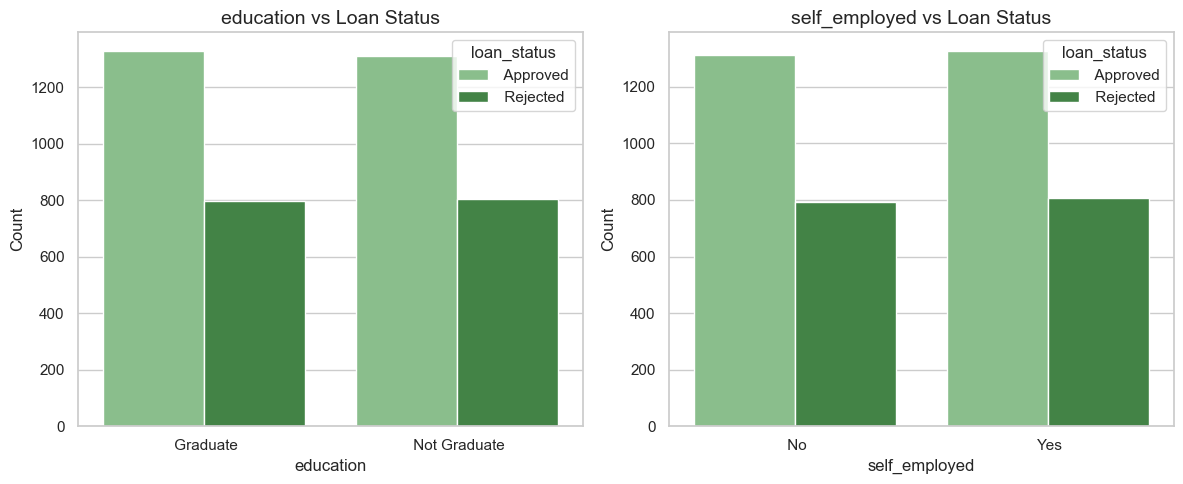

In [38]:
plt.figure(figsize=(12, 5))
for i, column in enumerate(categorical_columns[:-1], 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=column, hue='loan_status', data=df, palette=custom_palette)
    plt.title(f'{column} vs Loan Status', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


### **Insights:**

1. **Education:**
   - **Graduate vs. Not Graduate:**  
     The number of loan approvals is almost equal between graduates and non-graduates:
     - **Graduates:** 1329 approved, 798 rejected.
     - **Not Graduates:** 1311 approved, 803 rejected.
     
     **Insight:**
     - The distribution of `loan_status` (approved vs rejected) is fairly balanced between graduates and non-graduates, suggesting that education level does not strongly influence loan approval or rejection in this dataset. Both groups have almost the same number of approvals and rejections.

2. **Self Employed:**
   - **Yes vs. No:**  
     The approval and rejection counts are also very close between self-employed and non-self-employed applicants:
     - **Self Employed (Yes):** 1327 approved, 808 rejected.
     - **Self Employed (No):** 1313 approved, 793 rejected.
     
     **Insight:**
     - Similar to the education variable, there is a slight balance in loan approval rates for self-employed vs non-self-employed applicants, indicating that the self-employment status doesn't seem to drastically affect loan approval/rejection in this dataset.



# Categorical vs. Numerical:

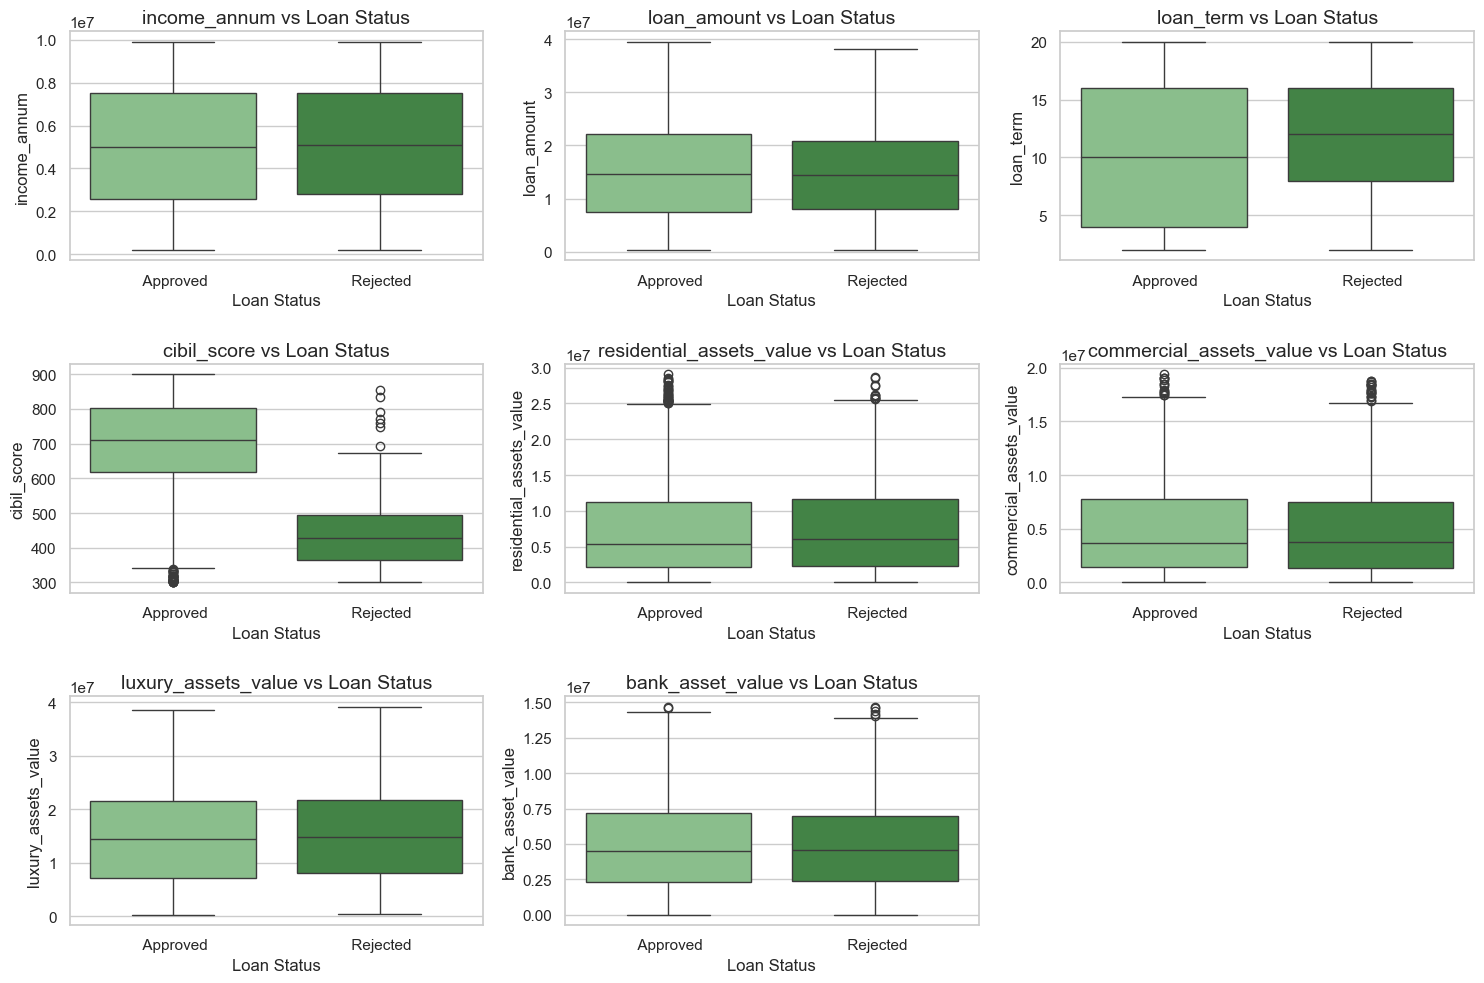

In [39]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='loan_status', y=column, data=df, palette=custom_palette)
    plt.title(f'{column} vs Loan Status', fontsize=14)
    plt.xlabel('Loan Status')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

### **Insights:**

1. **Income Annum (`income_annum`):**
   - Both `Approved` and `Rejected` groups have similar averages (~5.03M vs ~5.13M), medians (5M and 5.1M), and ranges.
   - **Insight:** Income alone doesn’t seem to be a strong differentiator for loan approval or rejection.

2. **Loan Amount (`loan_amount`):**
   - Mean loan amounts are similar for both groups (15.27M for Approved vs 15.02M for Rejected).
   - The 25th percentile shows slightly higher loan amounts for rejected applications (8M vs 7.5M).
   - **Insight:** Loan amount might have a marginal effect on rejection if it's relatively higher compared to other factors.

3. **Loan Term (`loan_term`):**
   - **Approved:** Mean term of ~10.39 years, with a median of 10 years.
   - **Rejected:** Mean term of ~11.74 years, with a median of 12 years.
   - **Insight:** Longer loan terms are more commonly associated with rejected applications. Applicants requesting longer repayment durations might be at higher risk of rejection.

4. **CIBIL Score (`cibil_score`):**
   - **Approved:** Higher mean (~ 703) and median (~711).
   - **Rejected:** Lower mean (~ 429) and median (~429).
   - **Insight:** A strong indicator of loan approval. Higher CIBIL scores are clearly correlated with loan approvals, as expected.

5. **Residential Assets (`residential_assets_value`):**
   - Slightly higher mean and median values for rejected applications (~7.65M mean for Rejected vs ~7.44M for Approved).
   - **Insight:** Marginal differences suggest that residential assets alone may not strongly impact approval but could contribute when combined with other factors.

6. **Commercial Assets (`commercial_assets_value`):**
   - Very similar statistics between Approved and Rejected groups.
   - **Insight:** Commercial assets don’t seem to play a significant role in loan approval decisions.

7. **Luxury Assets (`luxury_assets_value`):**
   - Median luxury assets are slightly higher for rejected applications (14.9M vs 14.5M).
   - **Insight:** Applicants with higher luxury assets might face rejection, potentially indicating risk perception or inadequate matching income/repayment ability.

8. **Bank Asset Value (`bank_asset_value`):**
   - Almost identical metrics for both groups, with minimal difference in mean (~4.97M for Approved vs ~5.03M for Rejected).
   - **Insight:** Bank asset value alone does not appear to influence loan status significantly.

---

### **Key Takeaways:**
- **CIBIL Score** is the strongest differentiator for loan status, with higher scores significantly favoring approval.
- **Loan Term:** Longer terms are more associated with rejection.
- **Luxury and Residential Assets:** Slightly higher values in rejected cases might indicate a mismatch between asset holdings and other factors (e.g., income or creditworthiness).
- Other variables like `income_annum`, `commercial_assets_value`, and `bank_asset_value` show marginal or no significant differences.



# Multivariate Analysis (Exploring Relationships Between More Than Two Variables)

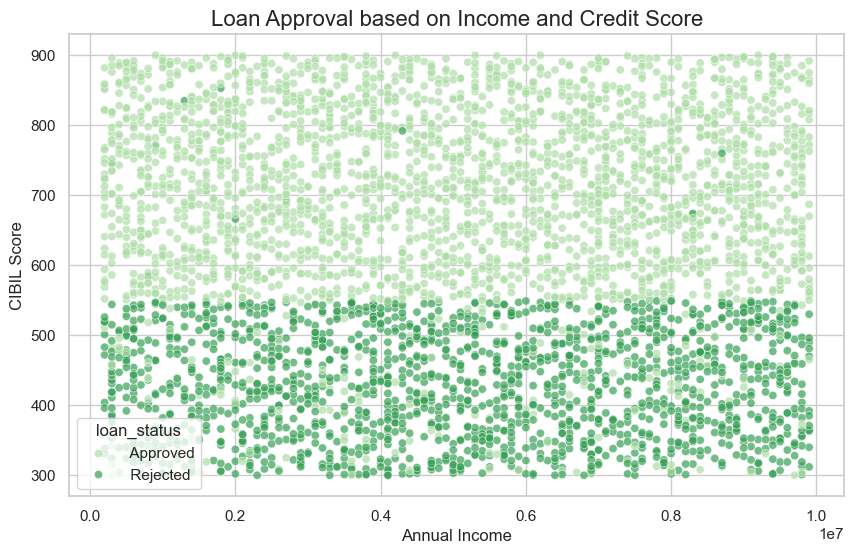

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income_annum', y='cibil_score', hue='loan_status', data=df, palette="Greens", alpha=0.7)
plt.title('Loan Approval based on Income and Credit Score', fontsize=16)
plt.xlabel('Annual Income')
plt.ylabel('CIBIL Score')
plt.show()

### Insights:

1. **CIBIL Score** is a critical differentiator between approved and rejected loans. Higher scores strongly correlate with loan approval.
2. **Income** does not show a significant impact on loan approval, as both groups have similar statistics. Other factors, such as credit score and asset values, likely play a larger role.

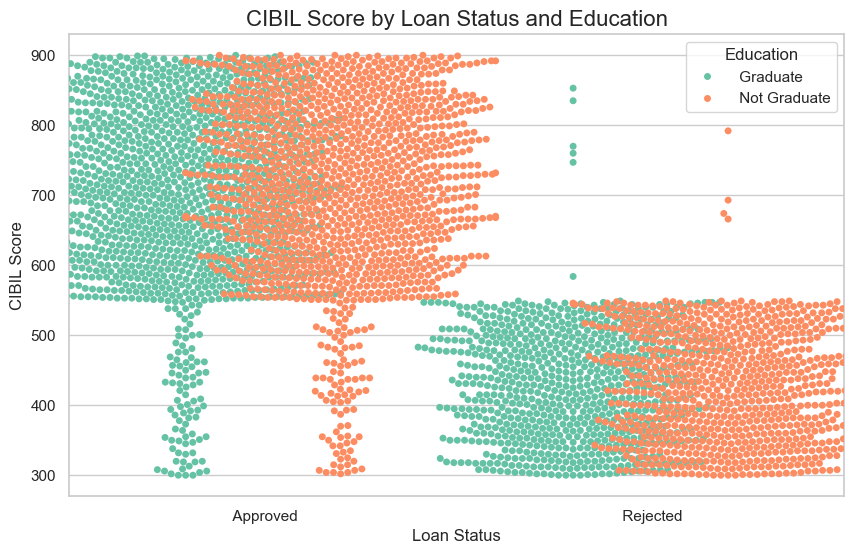

In [41]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='loan_status', y='cibil_score', data=df, hue='education', palette='Set2', dodge=True)
plt.title('CIBIL Score by Loan Status and Education', fontsize=16)
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.legend(title='Education')
plt.show()

### Insights from CIBIL Score by Loan Status and Education:

1. **Approved Loans:**
   - **Graduate** applicants have a **mean CIBIL score** of 700.03, while **Not Graduate** applicants have a slightly higher **mean** at 706.31. This suggests that being a Graduate or Not Graduate does not significantly affect the approval rates in terms of CIBIL scores, as the averages are quite close.
   - Both categories have high **maximum scores** (900), indicating that top-performing credit scores are seen in both graduate and non-graduate applicants.
   - The **spread (standard deviation)** for both Graduate and Not Graduate applicants is similar, which means that the variation in credit scores within each group is relatively consistent.

2. **Rejected Loans:**
   - **Graduate** applicants who were rejected have a **mean CIBIL score** of 429.60, while **Not Graduate** applicants have a slightly lower **mean** score of 428.56.
   - The **maximum CIBIL score** for rejected applicants is lower than for approved ones, with the highest score for graduates being 853 and 792 for non-graduates. This indicates that the higher the CIBIL score, the more likely it is to be approved.
   - The **spread** (standard deviation) for rejected graduates (77.59) and non-graduates (77.24) is quite similar, indicating that the variation in credit scores is consistent across both education levels within the rejected group.

3. **Key Observations:**
   - Applicants with higher CIBIL scores (close to or at 900) are more likely to be approved regardless of their education level.
   - There isn't a major difference in the CIBIL score averages between Graduates and Non-Graduates in both approved and rejected groups, suggesting that education level may not have as strong an impact on loan approval as expected, compared to CIBIL score.


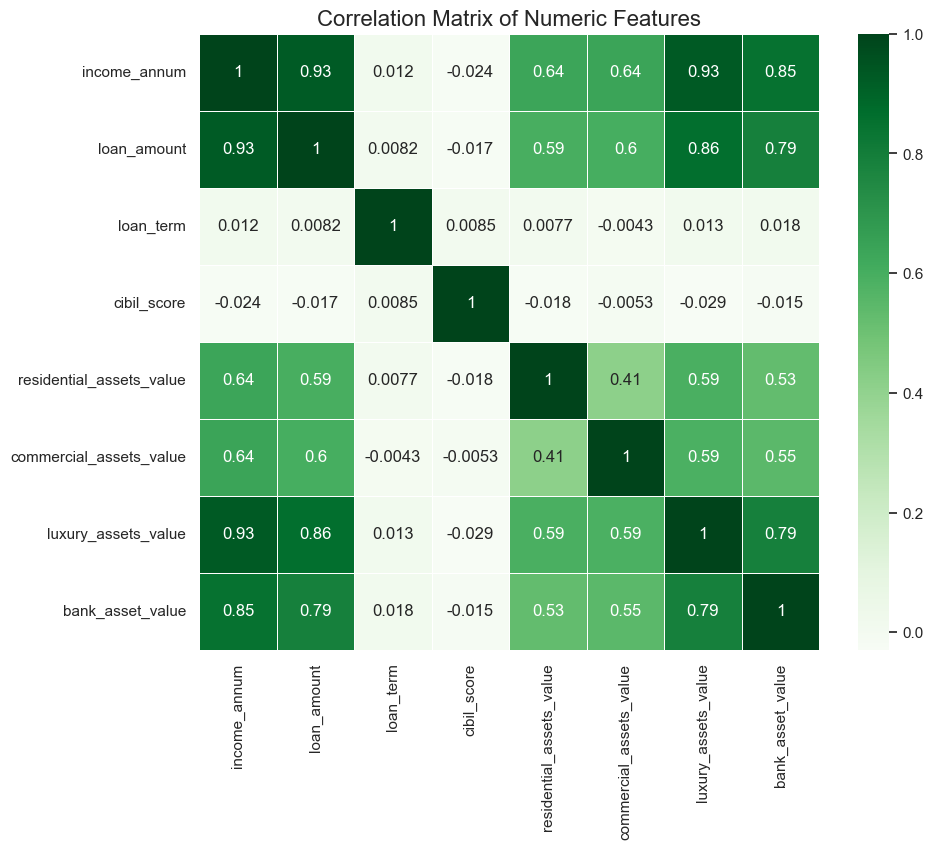

In [42]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

### Correlation Insights:

1. **Strong Positive Correlations:**
   - **`income_annum` and `loan_amount` (0.93):** There is a very strong positive correlation between annual income and loan amount, meaning that as the income increases, the loan amount tends to increase as well.
   - **`income_annum` and `luxury_assets_value` (0.93):** A strong positive correlation, indicating that individuals with higher income tend to have more luxury assets.
   - **`loan_amount` and `luxury_assets_value` (0.86):** Those who borrow larger amounts also tend to own more luxury assets.
   - **`income_annum` and `bank_asset_value` (0.85):** A strong correlation suggests that higher-income individuals are more likely to have significant bank assets.
   - **`loan_amount` and `bank_asset_value` (0.79):** Higher loan amounts are associated with higher bank assets.
   - **`residential_assets_value` and `luxury_assets_value` (0.59):** There's a moderate positive correlation, implying that people with more residential assets often also have more luxury assets.

2. **Moderate Correlations:**
   - **`residential_assets_value` and `commercial_assets_value` (0.41):** A moderate positive correlation, indicating that those with more residential assets are likely to have some level of commercial assets as well.
   - **`residential_assets_value` and `bank_asset_value` (0.53):** Individuals with higher residential assets tend to also have more bank assets.
   - **`luxury_assets_value` and `bank_asset_value` (0.79):** Strong positive correlation, showing that those who own more luxury assets are also likely to have significant bank assets.

3. **Weak/No Correlations:**
   - **`loan_term` shows very weak correlations** with all other variables (mostly close to 0), suggesting that the loan term is not strongly related to other financial variables like income, loan amount, or assets.
   - **`cibil_score` shows weak correlations** with other variables, particularly with income and loan amount (both negative correlations), indicating that higher income or larger loans don’t necessarily result in higher CIBIL scores.

### Key Takeaways:
- **Income** and **loan amounts** are strongly correlated with **luxury assets** and **bank assets**, which may suggest that higher-income individuals tend to have more financial resources.
- **Residential and commercial assets** have a moderate positive correlation, which might indicate that people with more residential properties may also invest in commercial properties.
- **Loan term** and **CIBIL score** are relatively weakly correlated with other variables, suggesting that these factors may be more independent in the loan approval process.